In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the data set
datas = sns.load_dataset("iris")
datas.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
datas.info() #melihat informasi detail dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#melihat apakahh ada missing value di dataset
datas.isnull().values.any()  #isnull bisa diganti dengan isna

False

In [5]:
#identify duplicate data
#datas[datas.duplicated()] #yg ditampilkan hanya baris sekunder
datas[datas.duplicated(keep = False)] #ditampilkan semua baris yg duplikat

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [6]:
#menghapus data yg duplikat
datas.drop_duplicates(inplace= True) #inplaces true untuk merubah dataframe yg sama
datas.shape

(149, 5)

In [7]:
#melihat deskripsi dataset
datas.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


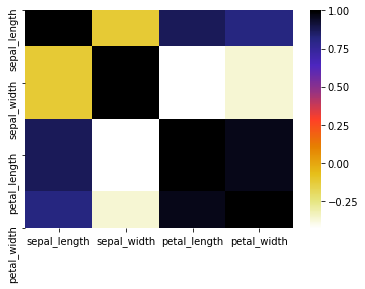

In [8]:
datas.corr() #untuk melihat korelasi antar kolom
%matplotlib inline
sns.heatmap(datas.corr(), cmap="CMRmap_r") 

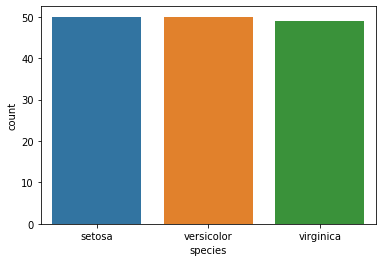

In [9]:
datas['species'].value_counts() #menghitung jumlah data tiap spesies
sns.countplot(data = datas, x='species')

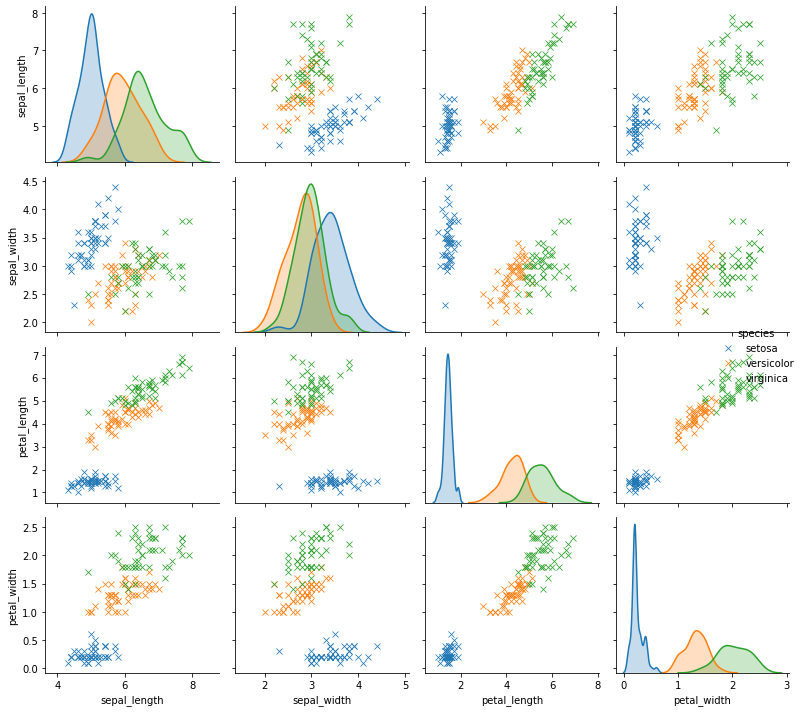

In [10]:
#melihat keseluruhan korelasi antar kolom dalam bentuk graph
sns.pairplot(data = datas, hue='species', markers='x')
plt.tight_layout()

# Membuat Model

In [11]:
from sklearn.model_selection import train_test_split #untuk membagi dataset menjadi data train dan data test 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #u/ evaluasi performa model

In [12]:
X = datas.drop(columns='species') #mengambil data x di dataset kecuali spesies
y = datas['species']
#Melakukan splitting data set menjadi 80% data train & 20% untuk data tes, random state = 10 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred=model_logreg.predict(X_test)
print(classification_report(y_test, y_pred)) #evaluasi klasifikasi

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.93      0.96        14
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
k_range= list(range(1,10)) #untuk menjajaki nilai k(jumlah neighbors) dari 1-25
scores = []
#untuk mencari nilai k optimal
for k in k_range:
    model_knn=KNeighborsClassifier(n_neighbors=k) #konfigurasi algoritma
    model_knn.fit(X_train, y_train)   #training model classifier
    y_pred=model_knn.predict(X_test) #proses testing untuk melakukan prediksi terhadap X test
    scores.append(accuracy_score(y_test, y_pred))#evaluasi performa

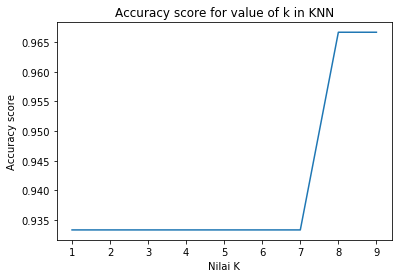

In [15]:
plt.plot(k_range, scores)
plt.xlabel('Nilai K')
plt.ylabel('Accuracy score')
plt.title('Accuracy score for value of k in KNN')
plt.tight_layout
plt.show()

In [16]:
model_knn=KNeighborsClassifier(n_neighbors=8) #n=8 karena dari grafik diatas menunjukkan acurracy tertinggi
model_knn.fit(X_train, y_train)   #training model classifier
y_pred=model_knn.predict(X_test)
print(classification_report(y_test, y_pred)) #evaluasi klasifikasi

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.93      0.96        14
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



## SVM

In [17]:
from sklearn.svm import SVC
model_svm = LogisticRegression(solver='lbfgs', multi_class='auto')
model_svm.fit(X_train,y_train)
y_pred=model_svm.predict(X_test)
print(classification_report(y_test, y_pred)) #evaluasi klasifikasi

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.93      0.96        14
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



## Random Forest Classifier 

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=20)
model_rf.fit(X_train, y_train)
y_pred= model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.86      0.92        14
   virginica       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



# Membandingkan hasil accuracy bbrp model

In [19]:
models = [model_logreg, model_knn, model_svm, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print(accuracy_scores)

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]


Text(0.5, 1.0, 'Comparison Classifier Model')

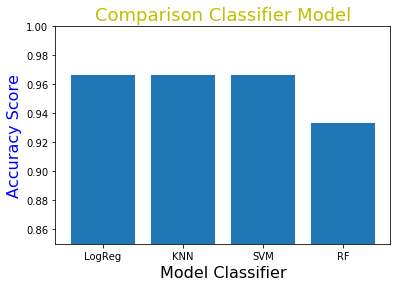

In [20]:
plt.bar(['LogReg', 'KNN', 'SVM','RF'],accuracy_scores)
plt.ylim(0.85,1) #membatasi sb Y
plt.xlabel('Model Classifier', fontsize=16, color='k')
plt.ylabel('Accuracy Score', fontsize=16, color='b')
plt.title('Comparison Classifier Model', fontsize=18, color='y')